# Generating the Markdown file with the given requirements.

markdown_content = """
# 需求说明

## 1. 功能需求

### 1.1 用户登录数据收集
收集并整理以下用户登录数据：
- **用户ID**  
- **登录时间**  
- **登录地址**  
- **登录资源**（是否登录成功）  
- **登录失败次数**  
- **登录成功率**  

通过对数据的统计分析，形成以下信息：
- 用户登录行为的基本特征  
- 正常登录模式  
- 异常登录特征  

---

### 1.2 异常登录检测模型构建
基于已知的异常登录特征和正常登录模式：
1. **构建机器学习模型**  
   - 分类用户登录行为为正常或异常。
2. **模型训练与调整**  
   - 利用历史数据对模型进行训练和优化，提高预测和检测的准确性。

---

### 1.3 阈值与规则设定
在进行登录异常检测时，根据实际情况设置合理的**阈值和规则**：
- 短时间内多次登录失败 → **异常行为**  
- 不同地点连续登录 → **可能异常**  

**灵敏度和准确性优化：**  
根据实际需求调整阈值和规则，提高异常检测能力。

---

## 2. 已知的异常登录情况

以下情况可判定为异常登录：
1. **频繁登录失败**  
   - 用户在短时间内多次失败尝试登录。  
2. **固定频率多账号尝试**  
   - 以固定频率使用不同账号尝试登录。  
3. **同账号多地址登录**  
   - 同一账号在短时间内从多个不同源地址登录。  
4. **非正常源地址登录**  
   - 使用异常的源地址尝试登录。  
5. **不存在的用户尝试**  
   - 使用系统中不存在的用户尝试登录。  

---

通过对上述功能和规则的实现，可以有效检测并应对用户登录中的异常行为。
"""


In [28]:
import pandas as pd
import numpy as np
import os

def generate_test_data(file_path="data/login_logs.csv"):
    """
    生成测试数据并保存至 CSV 文件
    """
    # 生成基础数据
    normal_size = 800
    abnormal_size = 200

    # 生成正常数据
    normal_data = {
        "用户ID": np.random.choice(["user1", "user2", "user3", "user4"], size=normal_size),
        "登录时间": pd.date_range("2024-11-01", periods=normal_size, freq="min"),
        "登录地址": np.random.choice(["192.168.1.1", "172.16.0.1", "10.17.0.1"], size=normal_size),
        "登录资源": np.random.choice(["server1", "server2"], size=normal_size),
        "是否登录成功": np.random.choice([0, 1], size=normal_size, p=[0.3, 0.7]),
        "是否异常": 0,  # 正常登录
    }

    # 生成异常数据
    abnormal_data = {
        "用户ID": np.random.choice(
            ["unknown_user", "user1", "user2"], size=abnormal_size, p=[0.5, 0.25, 0.25]
        ),
        "登录时间": pd.date_range("2024-11-01", periods=abnormal_size, freq="min"),
        "登录地址": np.random.choice(
            ["10.16.0.1", "suspicious_ip", "192.168.1.1"], size=abnormal_size
        ),
        "登录资源": np.random.choice(["server1", "server2"], size=abnormal_size),
        "是否登录成功": np.random.choice([0, 1], size=abnormal_size, p=[0.7, 0.3]),
        "是否异常": 1,  # 异常登录
    }

    # 合并数据
    df = pd.concat([pd.DataFrame(normal_data), pd.DataFrame(abnormal_data)]).reset_index(drop=True)

    # 确保保存路径的目录存在
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # 保存为 CSV 文件
    df.drop(columns=["是否异常"], inplace=True)  # 不包括是否异常字段
    df.to_csv(file_path, index=False, encoding="GBK")
    print(f"规则化测试数据已保存至: {file_path}")

# 调用函数生成测试数据
generate_test_data()




规则化测试数据已保存至: data/login_logs.csv


2024-11-22 09:41:26,214 - INFO - 成功加载文件: data/login_logs.csv
2024-11-22 09:41:26,220 - INFO - 数据预处理完成
2024-11-22 09:41:26,221 - INFO - 规则已添加: 频繁失败 - 每分钟失败比例超过 0.1
2024-11-22 09:41:26,221 - INFO - 规则已添加: 高频登录 - 短时间内高频登录
2024-11-22 09:41:26,221 - INFO - 规则已添加: 可疑地址 - 登录地址属于可疑网段
2024-11-22 09:41:26,222 - INFO - 规则已添加: 未知用户 - 未知用户尝试登录
2024-11-22 09:41:26,222 - INFO - 正在应用规则: 频繁失败 (每分钟失败比例超过 0.1)
2024-11-22 09:41:26,222 - INFO - 正在应用规则: 高频登录 (短时间内高频登录)
2024-11-22 09:41:26,222 - INFO - 正在应用规则: 可疑地址 (登录地址属于可疑网段)
2024-11-22 09:41:26,227 - INFO - 正在应用规则: 未知用户 (未知用户尝试登录)
2024-11-22 09:41:26,232 - INFO - 规则 '频繁失败' 匹配数量: 0 (0.00%)
2024-11-22 09:41:26,233 - INFO - 规则 '高频登录' 匹配数量: 102 (10.20%)
2024-11-22 09:41:26,234 - INFO - 规则 '可疑地址' 匹配数量: 71 (7.10%)
2024-11-22 09:41:26,236 - INFO - 规则 '未知用户' 匹配数量: 102 (10.20%)
2024-11-22 09:41:26,237 - INFO - 规则应用完成
2024-11-22 09:41:26,303 - INFO - 模型训练完成


分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00        41

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

模型准确率：1.00


/data/conda/envs/logs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/conda/envs/logs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/conda/envs/logs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30331 (\N{CJK UNIFIED IDEOGRAPH-767B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/conda/envs/logs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/conda/envs/logs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAP

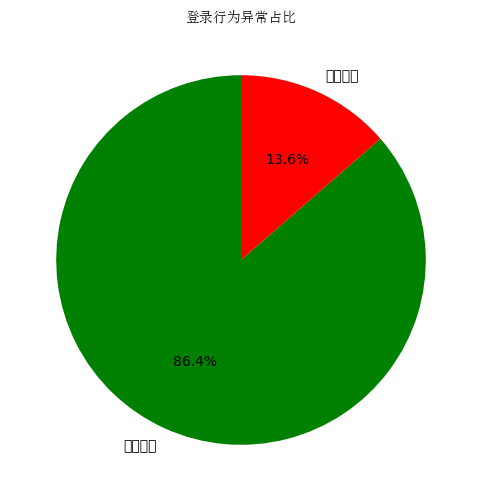


异常登录记录：
             用户ID           登录地址  登录失败次数     登录成功率      登录频率              异常类型
800  unknown_user    192.168.1.1      66  0.352941  0.512563        高频登录, 未知用户
802  unknown_user  suspicious_ip      66  0.352941  0.512563        高频登录, 未知用户
805  unknown_user      10.16.0.1      66  0.352941  0.512563  高频登录, 可疑地址, 未知用户
807  unknown_user      10.16.0.1      66  0.352941  0.512563  高频登录, 可疑地址, 未知用户
808  unknown_user      10.16.0.1      66  0.352941  0.512563  高频登录, 可疑地址, 未知用户
809  unknown_user      10.16.0.1      66  0.352941  0.512563  高频登录, 可疑地址, 未知用户
810  unknown_user    192.168.1.1      66  0.352941  0.512563        高频登录, 未知用户
811         user2      10.16.0.1      97  0.615079  0.320203              可疑地址
812  unknown_user  suspicious_ip      66  0.352941  0.512563        高频登录, 未知用户
813         user2      10.16.0.1      97  0.615079  0.320203              可疑地址


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import ipaddress
import logging
from matplotlib import font_manager as fm

# ------------------------------
# 设置日志
# ------------------------------
logging.basicConfig(level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s")

# ------------------------------
# 工具函数
# ------------------------------
def ip_in_subnet(ip, subnet):
    """
    检查 IP 是否属于指定网段
    """
    try:
        return ipaddress.ip_address(ip) in ipaddress.ip_network(subnet)
    except ValueError:
        return False

# ------------------------------
# 异常规则模块
# ------------------------------
class AnomalyRules:
    def __init__(self):
        """
        初始化异常规则管理
        """
        self.rules = []

    def add_rule(self, name, func, description=""):
        """
        添加新的异常规则
        """
        if not callable(func):
            raise ValueError(f"规则 {name} 的逻辑必须是一个可调用对象（函数）。")
        self.rules.append({"name": name, "func": func, "description": description})
        logging.info(f"规则已添加: {name} - {description}")

    def apply_rules(self, df):
        """
        应用所有规则并生成 '是否异常' 标记
        """
        results = {}
        for rule in self.rules:
            logging.info(f"正在应用规则: {rule['name']} ({rule['description']})")
            results[rule["name"]] = rule["func"](df)

        # 合并规则结果
        anomaly_flags = pd.DataFrame(results)
        df["是否异常"] = anomaly_flags.any(axis=1).astype(int)
        df["异常类型"] = anomaly_flags.apply(
            lambda row: ", ".join([name for name, val in row.items() if val]), axis=1
        )

        # 统计每个规则匹配的数量
        for rule_name, matches in results.items():
            match_count = matches.sum()
            match_ratio = match_count / len(df)
            logging.info(f"规则 '{rule_name}' 匹配数量: {match_count} ({match_ratio:.2%})")

            # 打印部分示例记录
            matched_records = df.loc[matches, ["用户ID", "登录地址", "登录失败次数", "每分钟失败比例", "登录频率"]].head(5)
            logging.debug(f"规则 '{rule_name}' 部分匹配记录:\n{matched_records}")

        logging.info("规则应用完成")
        return df


# ------------------------------
# 数据加载与生成
# ------------------------------
def load_login_data(file_path="data/login_logs.csv"):
    """
    加载指定文件中的用户登录数据，如果文件不存在则生成测试数据并返回
    """
    if os.path.exists(file_path):
        # 文件存在时，读取数据
        try:
            df = pd.read_csv(file_path, encoding="GBK")
            logging.info(f"成功加载文件: {file_path}")
        except Exception as e:
            logging.error(f"无法加载文件 {file_path}: {e}")
            raise
    else:
        # 文件不存在时，生成模拟测试数据
        logging.warning(f"文件 {file_path} 不存在，生成测试数据")
        data = {
            "用户ID": np.random.choice(["user1", "user2", "user3", "user4"], size=1000),
            "登录时间": pd.date_range("2024-11-01", periods=1000, freq="min"),
            "登录地址": np.random.choice(["192.168.1.1", "10.16.0.1", "172.16.0.1", "10.17.0.1"], size=1000),
            "登录资源": np.random.choice(["server1", "server2"], size=1000),
            "是否登录成功": np.random.choice([0, 1], size=1000, p=[0.3, 0.7]),
        }
        df = pd.DataFrame(data)

        # 添加模拟异常
        df.loc[np.random.choice(df.index, 50), "用户ID"] = "unknown_user"
        df.loc[np.random.choice(df.index, 50), "登录地址"] = "suspicious_ip"

        logging.info("模拟登录数据生成完成")
    
    return df

# ------------------------------
# 数据预处理
# ------------------------------
def preprocess_data(df):
    """
    数据清洗和特征提取
    """
    df["登录时间"] = pd.to_datetime(df["登录时间"], errors="coerce")

    # 按用户ID计算时间范围和失败次数
    df["时间范围分钟"] = df.groupby("用户ID")["登录时间"].transform(
        lambda x: max(1, (x.max() - x.min()).total_seconds() / 60)
    )
    df["登录失败次数"] = df.groupby("用户ID")["是否登录成功"].transform(lambda x: (x == 0).sum())
    df["每分钟失败比例"] = df["登录失败次数"] / df["时间范围分钟"]

    # 计算其他特征
    df["登录成功率"] = df.groupby("用户ID")["是否登录成功"].transform("mean")
    df["登录频率"] = df.groupby("用户ID")["登录时间"].transform(
        lambda x: len(x) / ((x.max() - x.min()).total_seconds() / 60)
    )

    # 编码用户ID和地址
    encoder = LabelEncoder()
    df["用户编码"] = encoder.fit_transform(df["用户ID"])
    df["地址编码"] = encoder.fit_transform(df["登录地址"])

    logging.info("数据预处理完成")
    return df


# ------------------------------
# 构建和训练模型
# ------------------------------
def train_model(df):
    """
    训练分类模型
    """
    features = ["用户编码", "地址编码", "登录失败次数", "登录成功率", "登录频率"]
    X = df[features]
    y = df["是否异常"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    logging.info("模型训练完成")
    print("分类报告：")
    print(classification_report(y_test, y_pred))
    print(f"模型准确率：{accuracy_score(y_test, y_pred):.2f}")

    return model

# ------------------------------
# 可视化异常数据
# ------------------------------
def visualize_anomalies(df):
    """
    绘制异常统计结果
    """
    anomaly_count = df["是否异常"].value_counts()
    labels = anomaly_count.index.map(lambda x: "异常登录" if x == 1 else "正常登录").tolist()

    font_path = "../conf/simsun.ttc"
    my_font = fm.FontProperties(fname=font_path)
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        anomaly_count,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=["green", "red"][:len(anomaly_count)]
    )
    plt.title("登录行为异常占比", fontproperties=my_font)
    plt.show()

    anomalies = df[df["是否异常"] == 1]
    print("\n异常登录记录：")
    print(anomalies[["用户ID", "登录地址", "登录失败次数", "登录成功率", "登录频率", "异常类型"]].head(10))

# ------------------------------
# 主程序
# ------------------------------
if __name__ == "__main__":
    # 加载数据
    df = load_login_data()

    # 数据预处理
    df = preprocess_data(df)

    # 定义异常规则
    anomaly_rules = AnomalyRules()
    anomaly_rules.add_rule(
        "频繁失败", 
        lambda x: x["每分钟失败比例"] > 1,  # 每分钟失败比例大于0.1
        "每分钟失败比例超过 0.1"
    )
    anomaly_rules.add_rule(
        "高频登录", 
        lambda x: x["登录频率"] > 0.5, 
        "短时间内高频登录"
    )
    anomaly_rules.add_rule(
        "可疑地址",
        lambda x: x["登录地址"].apply(lambda ip: ip_in_subnet(ip, "10.16.0.0/16")),
        "登录地址属于可疑网段"
    )
    anomaly_rules.add_rule(
        "未知用户", 
        lambda x: x["用户ID"] == "unknown_user", 
        "未知用户尝试登录"
    )

    # 应用规则
    df = anomaly_rules.apply_rules(df)

    # 模型训练
    model = train_model(df)

    # 可视化异常数据
    visualize_anomalies(df)










